In [1]:
import numpy as np
import scipy
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

In [2]:
x, sr = librosa.load('audio/piano_c.wav', sr=44100)
ipd.Audio(x, rate=sr)

In [3]:
xv, sr = librosa.load('audio/violin_c.wav', sr=44100)
ipd.Audio(xv, rate=sr)

In [4]:
def plot_spectrogram(signal, name):
    """Compute power spectrogram with Short-Time Fourier Transform and plot result."""
    spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(signal)))
    plt.figure(figsize=(20, 15))
    librosa.display.specshow(spectrogram, y_axis="log")
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Log-frequency power spectrogram for {name}")
    plt.xlabel("Time")
    plt.show()
    



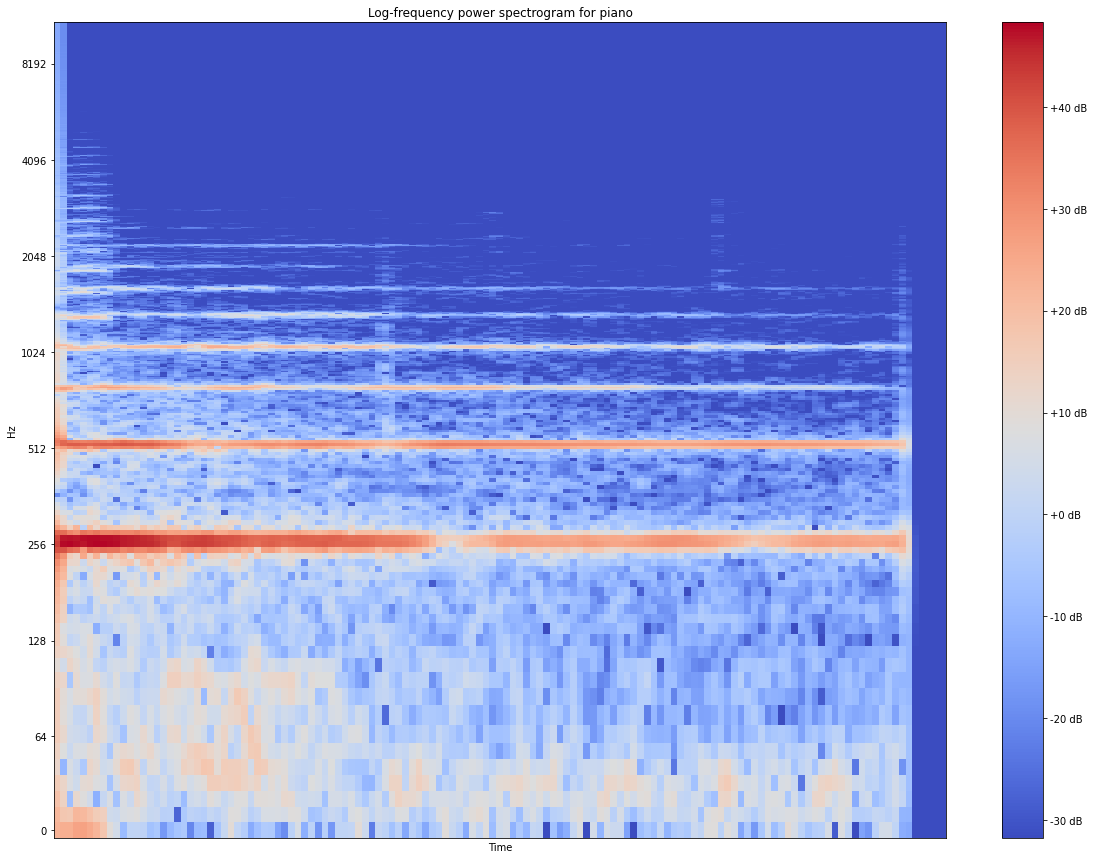

In [7]:
plot_spectrogram(x, "piano")

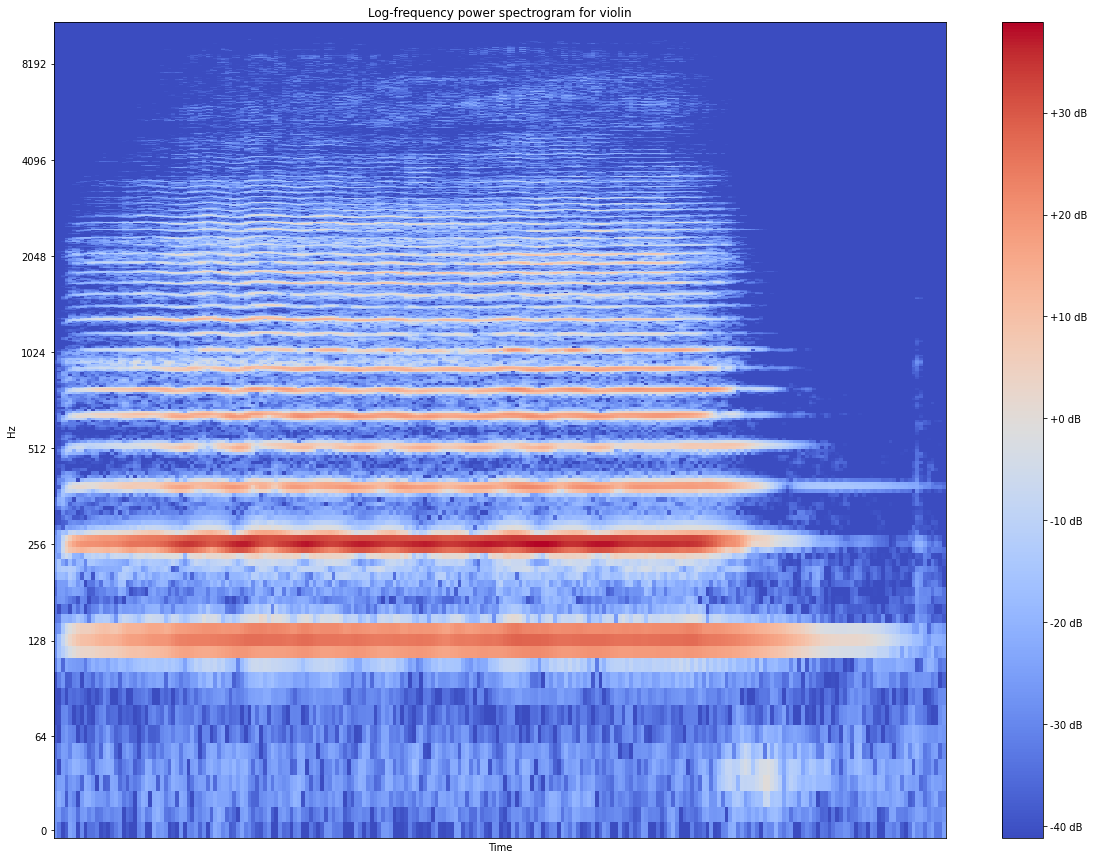

In [8]:
plot_spectrogram(xv, "violin")

The colour shows the intensity of the frequency at each specific time

### Masking in frequency domain

In [5]:
xsin, sr = librosa.load('audio/sin.wav', sr=6000)
xnoise, sr = librosa.load('audio/noise.wav', sr=6000)
xmix, sr = librosa.load('audio/mix_sin_bpnoise.wav', sr=6000)

In [6]:
ipd.Audio(xmix, rate=sr)

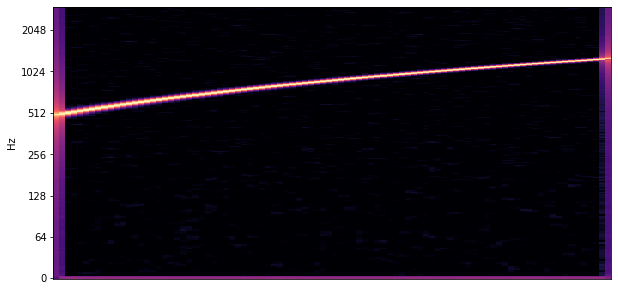

In [23]:
spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(xsin)))
plt.figure(figsize=(10, 5))
librosa.display.specshow(spectrogram, y_axis="log", sr=6000)

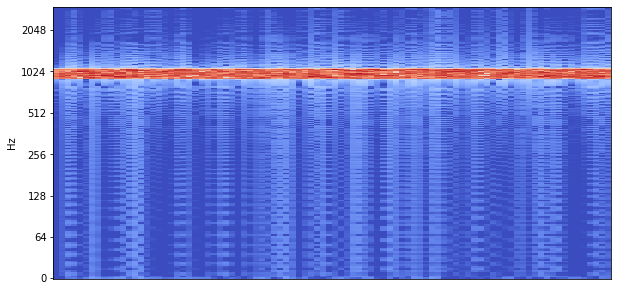

In [24]:
spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(xnoise)))
plt.figure(figsize=(10, 5))
librosa.display.specshow(spectrogram, y_axis="log", sr=6000)

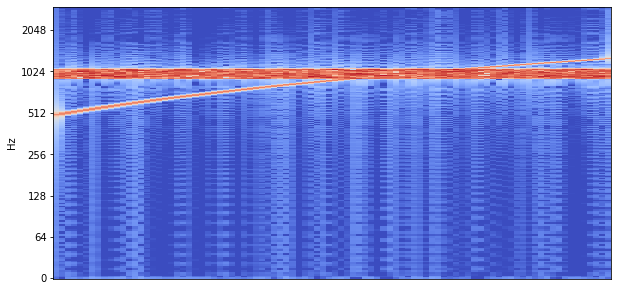

In [25]:
spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(xmix)))
plt.figure(figsize=(10, 5))
librosa.display.specshow(spectrogram, y_axis="log", sr=6000)

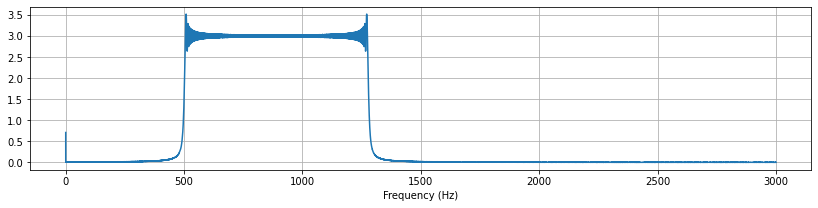

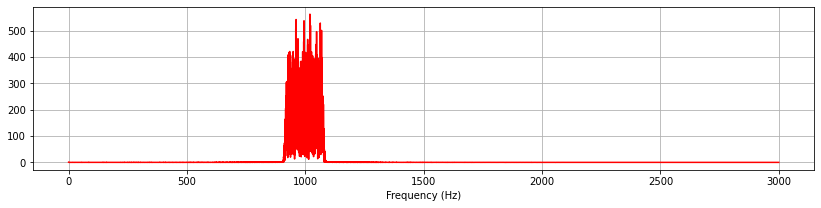

In [51]:
X = scipy.fft.fft(xsin)
f = np.linspace(0, sr, len(X))
X_mag = np.absolute(X)
plt.figure(figsize=(14, 3))
plt.plot(f[:len(X)//2], X_mag[:len(X)//2])
plt.xlabel('Frequency (Hz)')
plt.grid()
plt.show()

plt.figure(figsize=(14, 3))
X = scipy.fft.fft(xnoise)
f = np.linspace(0, sr, len(X))
X_mag = np.absolute(X)
plt.plot(f[:len(X)//2], X_mag[:len(X)//2], c='r')

plt.xlabel('Frequency (Hz)')
plt.grid()
plt.show()

## Generating narrow band noise

In [174]:
def fftnoise(f):
    f = np.array(f, dtype='complex')
    Np = (len(f) - 1) // 2
    phases = np.random.rand(Np) * 2 * np.pi
    phases = np.cos(phases) + 1j * np.sin(phases)
    f[1:Np+1] *= phases
    f[-1:-1-Np:-1] = np.conj(f[1:Np+1])
    return np.fft.ifft(f).real

def band_limited_noise(min_freq, max_freq, samples=1024, samplerate=1):
    freqs = np.abs(np.fft.fftfreq(samples, 1/samplerate))
    f = np.zeros(samples)
    idx = np.where(np.logical_and(freqs>=min_freq, freqs<=max_freq))[0]
    f[idx] = 1
    return fftnoise(f)


In [175]:
xn = band_limited_noise(600, 800, samples=len(xsin), samplerate=6000)


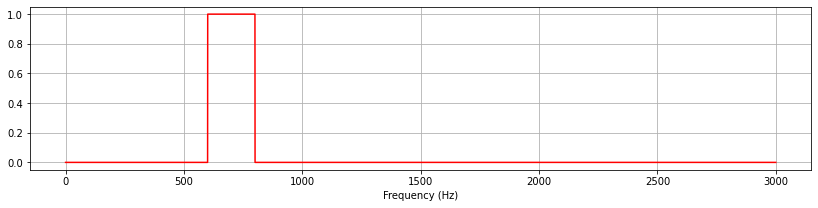

In [176]:
plt.figure(figsize=(14, 3))
X = scipy.fft.fft(xn)
f = np.linspace(0, sr, len(X))
X_mag = np.absolute(X)
plt.plot(f[:len(X)//2], X_mag[:len(X)//2], c='r')

plt.xlabel('Frequency (Hz)')
plt.grid()
plt.show()

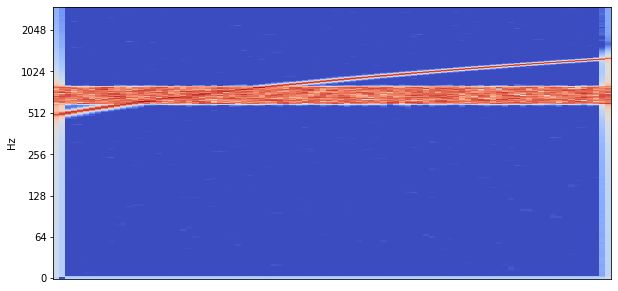

In [180]:
newmix = xsin + 10*xn
plt.figure(figsize=(10, 5))
spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(newmix)))
librosa.display.specshow(spectrogram, y_axis="log", sr=6000)

In [181]:
ipd.Audio(newmix, rate=sr)

### Mel filter banks

In [9]:
filter_banks = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=10)
print(filter_banks.shape)

(10, 1025)


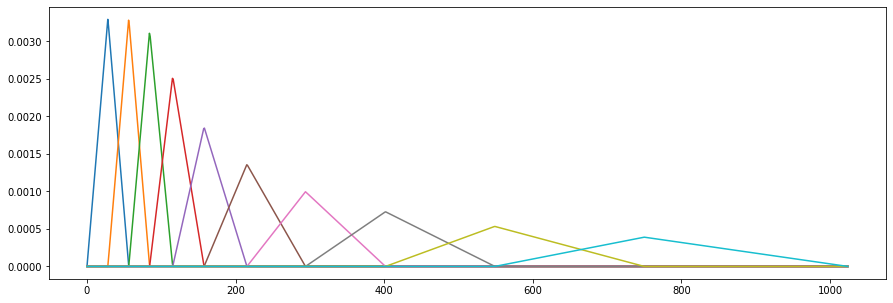

In [10]:
plt.figure(figsize=(15, 5))
for mel in filter_banks:
    plt.plot(mel.T)


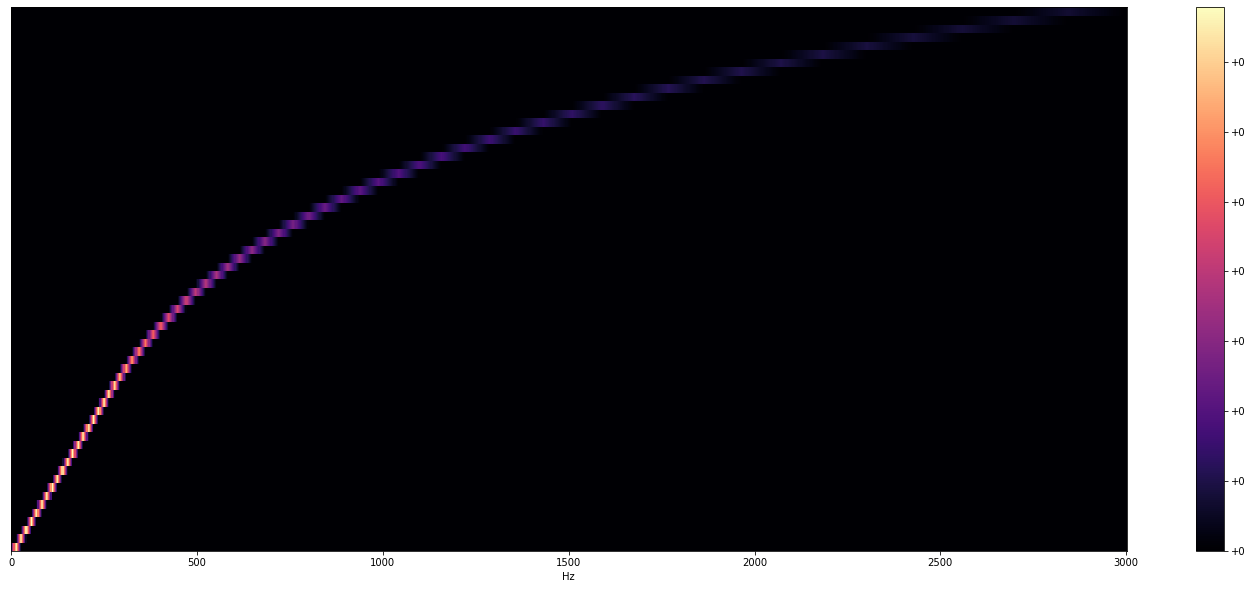

In [195]:
plt.figure(figsize=(25, 10))
filter_banks = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=64)
librosa.display.specshow(filter_banks, sr=sr, x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()